In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import mglearn
from metrics import metrics

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus= False)
plt.style.use('ggplot')
pd.options.display.max_columns  = 100

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [15]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,bdf8a757c9cdee,4fab7e473a0267,0e73cdce6f36f2,0,0,251.00,3,0,0,10,0,3,2,6.814,1901,squad,29,28,1271,0,0.0,0,0.00,0,0,87.30,1,0,0.0000
1,207f1143491ce0,1f0fb219352ea5,05a28db80e3f63,0,0,200.00,1,0,0,22,0,2,2,18.010,1400,duo-fpp,48,45,1507,0,0.0,0,0.00,0,0,195.10,1,0,0.2553
2,cc339dc4a3010b,229f9ac084f97b,00ddf3b6f5ee57,0,1,0.00,0,0,2,53,1000,0,0,0.000,1891,squad-fpp,30,26,-1,0,3273.0,0,0.00,0,0,1452.00,7,1500,0.6207
3,18cd9933f2a21c,4ce7d12146eb77,b852f59b282683,0,0,98.28,0,0,0,77,0,0,0,0.000,1871,duo-fpp,48,46,1487,0,0.0,0,0.00,0,0,133.60,3,0,0.1915
4,ec204fa08626d7,2d5698dc58effd,a7ec987ab3ec32,0,0,0.00,0,0,0,90,0,0,0,0.000,1403,squad-fpp,28,27,1451,0,0.0,0,0.00,0,0,15.73,1,0,0.0370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975954,e85c692a6d5a41,1a8611724b047d,0b81455ed45a92,0,3,100.00,1,0,11,23,1177,1,1,11.130,1874,duo-fpp,41,41,-1,1,2833.0,0,0.00,0,0,1926.00,4,1553,0.8000
975955,ee409ffb87cf8e,2dbfb28966ef87,e6a87e1ca24a34,0,0,0.00,0,0,0,75,0,0,0,0.000,1444,squad,28,27,1497,0,0.0,0,0.00,0,0,30.35,1,0,0.0741
975956,c1064e258d2205,38435092679e83,20b23d9924b215,1,3,445.80,3,2,3,14,1505,2,1,64.990,1397,squad-fpp,30,30,-1,0,0.0,0,24.67,0,0,2487.00,5,1467,0.8966
975957,920851aaef3454,1604977a533017,ec7dcf768c45a0,0,0,0.00,0,0,1,57,0,0,0,0.000,1756,squad,28,28,1361,0,7531.0,0,0.00,0,0,916.70,6,0,0.4444


In [14]:
test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,13f880e03acd10,138e784676735d,ba8e006da83a6e,0,3,25.95,0,0,1,55,0,0,0,0.000,1813,duo-fpp,49,48,1525,0,4343.0,0,0.0,0,0,1004.00,3,0
1,5831e846e451ed,14b7de73ead817,1f4d1ac9157a84,0,0,0.00,0,0,0,92,0,0,0,0.000,1876,squad,30,28,1335,0,0.0,0,0.0,0,0,0.00,0,0
2,b5f7a6f2318e15,2371fcc16d02a8,d7c64d5c3ce30d,0,1,181.10,0,0,0,22,1000,1,1,8.444,1774,solo-fpp,97,95,-1,0,0.0,0,0.0,0,0,1498.00,9,1500
3,9166508bfe2348,11b1e63e1f5451,73b8f546eaee47,0,5,334.90,2,0,7,23,0,1,1,347.400,1864,squad-fpp,28,28,1588,3,2169.0,0,0.0,0,0,3539.00,5,0
4,b67841b9bfd4dc,4a2a622d65d292,ebcc5bdcb0137a,0,0,0.00,0,0,0,94,1009,0,0,0.000,1291,squad,31,31,-1,0,0.0,0,0.0,0,0,94.61,0,1499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418264,f8240f84856357,47c7bf8432be0a,efde630ea851ab,0,0,352.20,2,1,0,11,0,3,2,23.670,1336,duo-fpp,49,45,1495,0,0.0,0,0.0,0,0,218.50,2,0
418265,23fbc148e60d07,2ae203cb949629,cc2926b66515d5,0,4,57.25,0,0,5,50,0,0,0,0.000,1797,solo-fpp,95,90,1972,0,0.0,0,224.1,0,0,2584.00,5,0
418266,a76ed754da2a6e,3e112624726a31,be38ff72189bb0,0,3,347.70,1,1,2,28,1549,1,1,107.400,1375,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1686.00,4,1542
418267,c95a9374657a1a,16103ab3308962,83c962a2f40607,0,2,76.00,1,1,2,29,0,1,1,47.790,1416,duo-fpp,48,46,1506,0,0.0,0,0.0,0,0,1664.00,5,0


In [4]:
train = train[['assists', 'boosts', 'heals', 'damageDealt','DBNOs', 'kills', 'headshotKills', 'killStreaks','longestKill', 'rideDistance','walkDistance','weaponsAcquired','winPlacePerc']]
train.head(1)

,assists,boosts,heals,damageDealt,DBNOs,kills,headshotKills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0,251.0,3,3,0,2,6.814,0.0,87.3,1,0.0


In [5]:
test = test[['assists', 'boosts', 'heals', 'damageDealt','DBNOs', 'kills', 'headshotKills', 'killStreaks','longestKill', 'rideDistance','walkDistance','weaponsAcquired']]
test.head(1) # 최종 test

,assists,boosts,heals,damageDealt,DBNOs,kills,headshotKills,killStreaks,longestKill,rideDistance,walkDistance,weaponsAcquired
0,0,3,1,25.95,0,0,0,0,0.0,4343.0,1004.0,3


In [6]:
train = train.fillna(0)
test = test.fillna(0)

# RandomForest

In [7]:
X = train.drop(['winPlacePerc'],axis=1)
y = train['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 531)

In [53]:
rf = RandomForestRegressor(random_state=1)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [55]:
rf_pred = rf.predict(X_test)
rf_pred

array([0.804268  , 0.282817  , 0.817397  , ..., 0.84952233, 0.38491967,
       0.294172  ])

In [63]:
print('랜덤 포레스트 정확도: {:.8f}'.format(rf.score(X_train, y_train)))

랜덤 포레스트 정확도: 0.950498


In [58]:
pd.DataFrame(rf_pred)

,0
0,0.804268
1,0.282817
2,0.817397
3,0.910423
4,0.445901
...,...
292783,0.093879
292784,0.243298
292785,0.849522
292786,0.384920


In [62]:
mse = mean_squared_error(y_test, rf_pred)
print('mse=', mse)

mse= 0.02242614985869028


In [61]:
np.sqrt(np.mean((rf_pred - y_test)**2))

0.14975363053593008

##  하이퍼 파라미터

In [24]:
from sklearn.model_selection import GridSearchCV

In [10]:
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestRegressor()
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
rf_param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 9],
    'min_samples_split' : [2, 6, 8, 10]
}

In [20]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, n_jobs= -1, verbose= 1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 154.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 436.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 704.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
print('최적 하이퍼 파라미터: ', rf_grid.best_params_)
print('최고 예측 정확도: {:.8f}'.format(rf_grid.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.7883


## 테스트 세트로 예측 성능 측정

In [29]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestRegressor(n_estimators = 200, 
                                max_depth = 12,
                                min_samples_leaf = 7,
                                min_samples_split = 2,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

In [40]:
pred

array([0.79503508, 0.2715186 , 0.83826216, ..., 0.86658653, 0.36900123,
       0.36172074])

In [49]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, pred)
print('mse=', mse)

mse= 0.019879969292252057


In [64]:
print('랜덤 포레스트 정확도: {:.8f}'.format(rf_clf1.score(X_train, y_train)))

랜덤 포레스트 정확도: 0.79700437


Random Forest의 각 피처의 중요도 시각화 : featureimportances

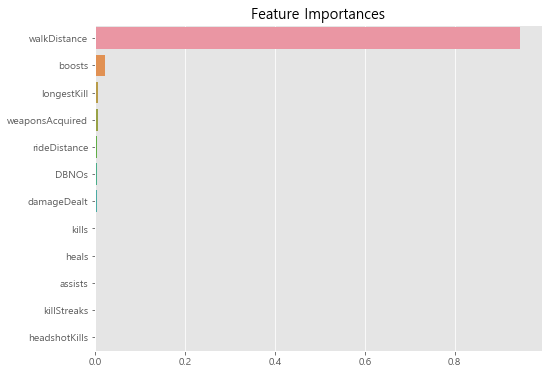

In [38]:
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr, y=ftr.index)
plt.show()

#  Gradient Boost

Gradient Boost는 회귀와 분류에 모두 사용할 수 있는 모델입니다.

랜덤 포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듭니다.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.8f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.8f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.789
테스트 세트 정확도: 0.789


In [35]:
# 깊이 수정 
gbrt = GradientBoostingRegressor(random_state=0, max_depth=1)

gbrt_fit =  gbrt.fit(X_train, y_train)
gbrt

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
print("훈련 세트 정확도: {:.8f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.8f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.779
테스트 세트 정확도: 0.781


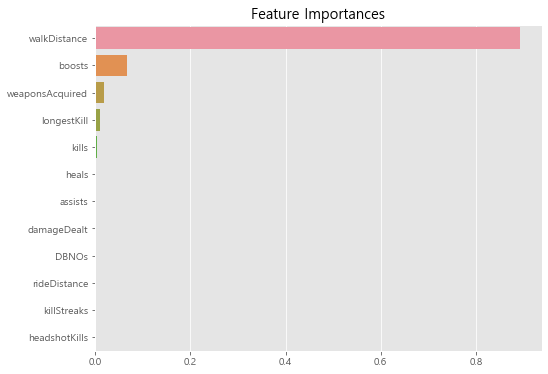

In [37]:
%matplotlib inline

ftr_importances_values = gbrt_fit.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr, y=ftr.index)
plt.show()

# xgboost

In [22]:
from xgboost import plot_importance
from xgboost import XGBRegressor

In [16]:
print(X_train.shape, X_test.shape)

(683171, 12) (292788, 12)


In [ ]:
xgb = XGBRegressor(random_state=1)

In [ ]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred

In [17]:
xgb = XGBRegressor(n_estimators=500, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0.77611077, 0.25028408, 0.8589381 , ..., 0.81790364, 0.41572315,
       0.35788786], dtype=float32)

In [18]:
pd.DataFrame(xgb_pred)

,0
0,0.776111
1,0.250284
2,0.858938
3,0.904297
4,0.498657
...,...
292783,0.123741
292784,0.252577
292785,0.817904
292786,0.415723


In [90]:
test1 = pd.DataFrame(y_test)
test1

,winPlacePerc
13141,0.7872
857120,0.2045
741613,0.6800
524002,0.8163
575367,0.3600
...,...
697863,0.1290
799020,0.1481
340664,1.0000
274164,0.4062


In [19]:
np.sqrt((xgb_pred - y_test)**2).mean()

0.10351426630409963

In [20]:
np.sqrt(np.mean((xgb_pred - y_test)**2))

0.14007679023589711

In [ ]:
y_test랑 rmse? rms? / mae?  비교해서 랜덤포레스트랑 비교해서 어떤게 더 좋은지 확인하고 좋은거 선택후 파라미터 

In [75]:
train1 = pd.DataFrame(y_train)
train1

,winPlacePerc
382704,0.5333
357835,0.0769
377077,0.8621
640209,0.9630
156912,0.7333
...,...
877227,0.4444
782767,0.0000
899532,0.5714
66484,0.5769
